In [1]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#엔트로피 계산해보기
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [3]:
-0.8 * np.log2(0.8) - 0.2 * np.log2(0.2)

0.72192809488736231

In [4]:
#eps는 극한 0으로 가는 최소숫자를 뜻함
eps = np.finfo(float).eps
-1 * np.log2(1) - 0 * np.log2(eps)

0.0

In [5]:
#연습문제 정보량 구하기
1*(1/2) + 2*(1/4) + 3*(1/8) + 4*(1/16) +6*(1/64)+6*(1/64)+6*(1/64)+6*(1/64)

2.0

In [6]:
# DecisionTreeClassifier
# 일단 클래스구분에 사용하기로 하자

# DecisionTreeRegressor
# 아래는 회귀분석으로 의사결정나무를 쓴 경우임
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [9]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

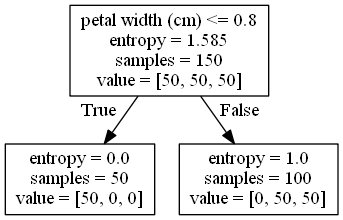

In [10]:
# 트리가 안뜨로 에러뜨면 아래 링크 참조해서 따라하고 깔자
# https://stackoverflow.com/questions/40632486/dot-exe-not-found-in-path-pydot-on-python-windows-7
# https://www.codesofinterest.com/2017/02/visualizing-model-structures-in-keras.html

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/creal/graphviz-2.38/release/bin'

draw_decision_tree(tree1)

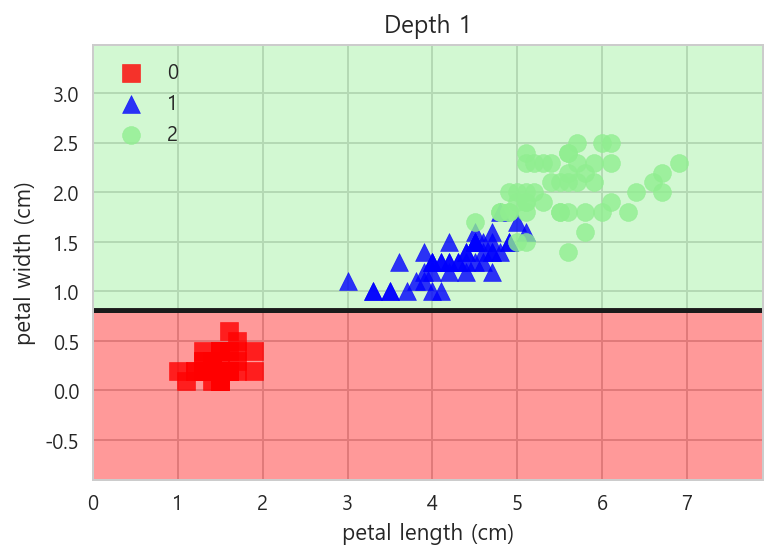

In [12]:

plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

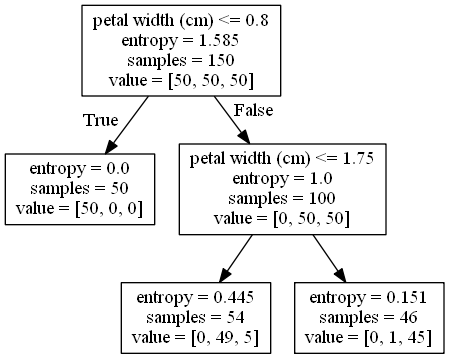

In [29]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
draw_decision_tree(tree2)

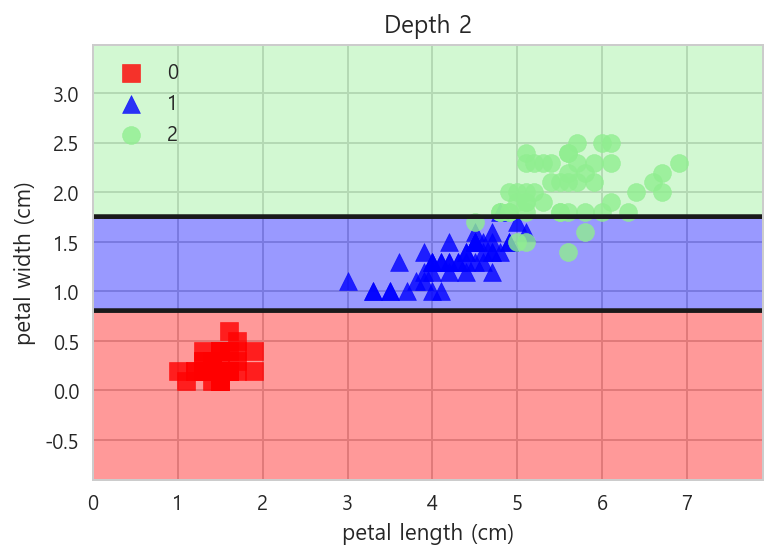

In [18]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()


In [19]:
confusion_matrix(y, tree2.predict(X))


array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

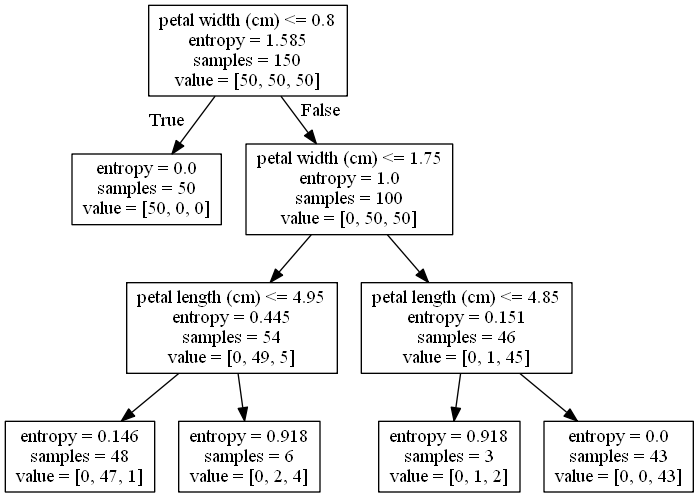

In [24]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)
draw_decision_tree(tree3)

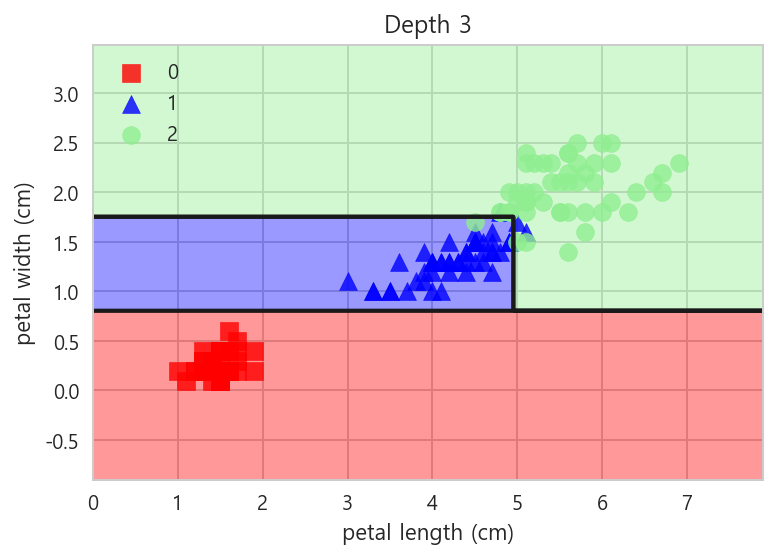

In [30]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()


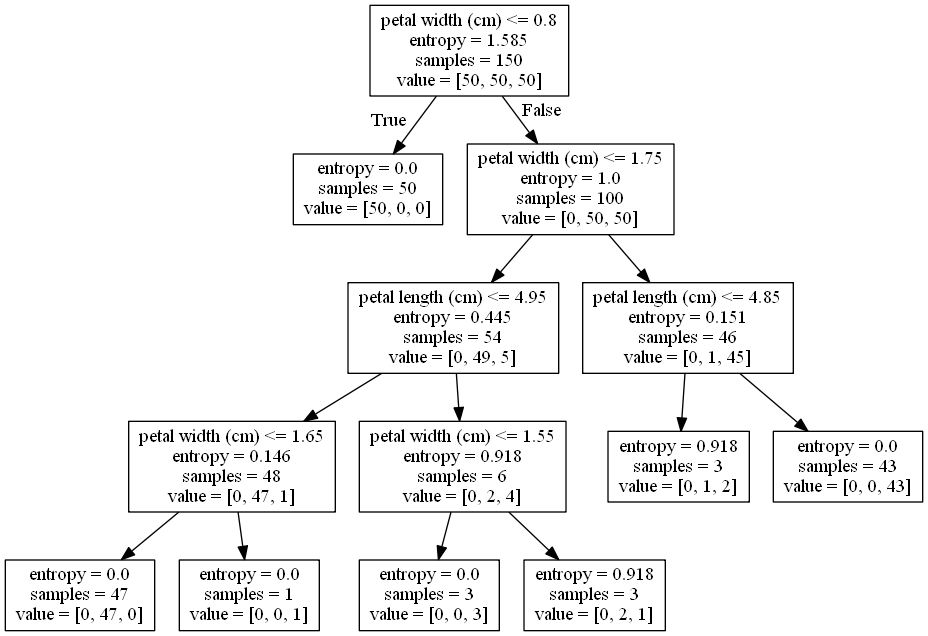

In [31]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)
draw_decision_tree(tree4)


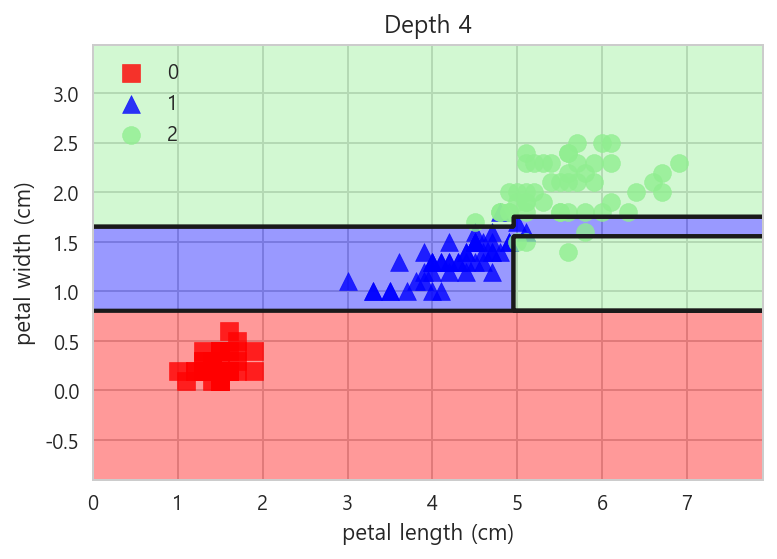

In [32]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()


In [33]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

In [ ]:
# 연습 문제 1¶
# 1. 붓꽃 분류 문제에서 꽃잎의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 accuracy 성능을 측정한다.
# 2. K=5 인 교차 검증을 통해 평균 accuracy 성능을 측정한다.
# 3. max_depth 인수를 바꾸어 가면서 가장 평균 accuracy 성능이 좋은 max_depth 인수를 찾아라.

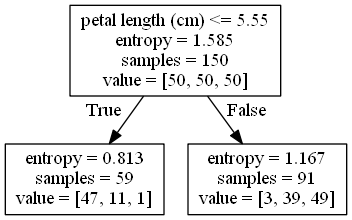

In [45]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
draw_decision_tree(tree1)


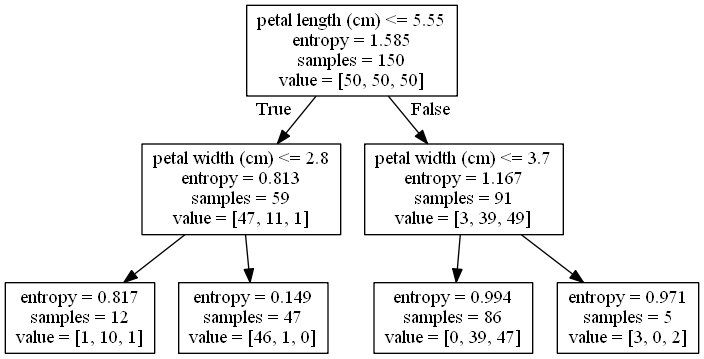

In [51]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
draw_decision_tree(tree2)

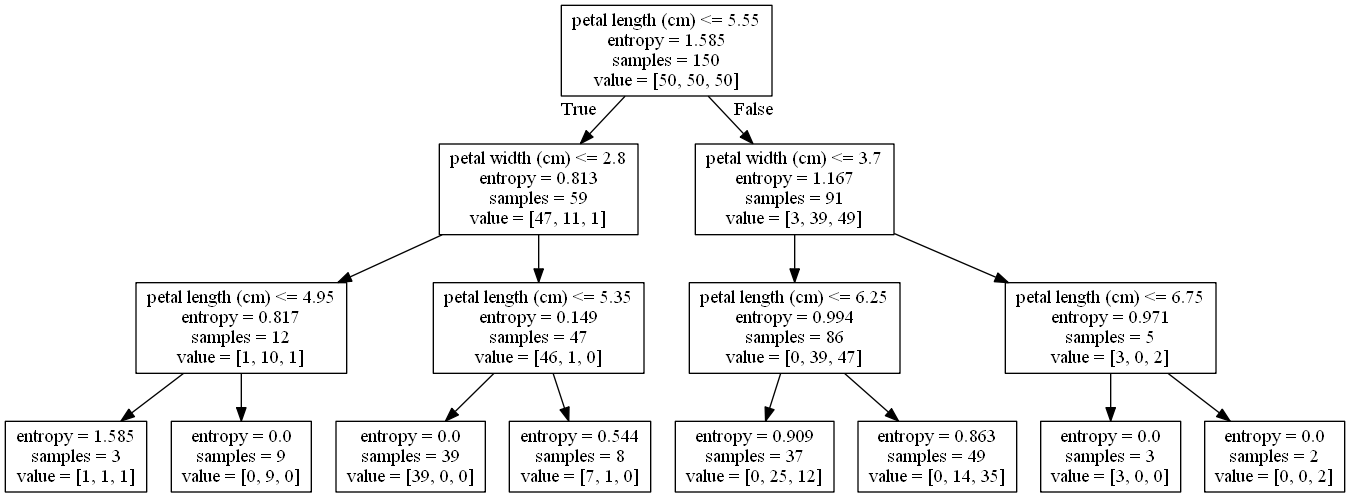

In [53]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)
draw_decision_tree(tree3)

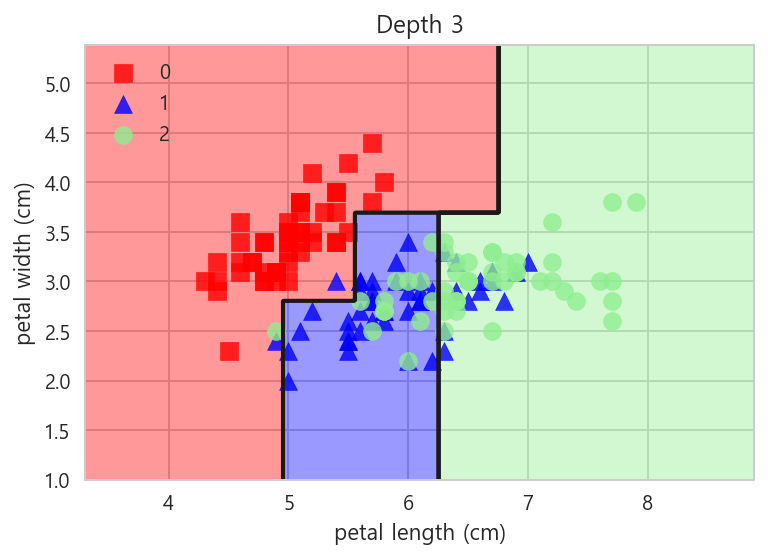

- Accuracy_Score :  0.806666666667
- Confusion_Matrix 
 [[50  0  0]
 [ 2 34 14]
 [ 1 12 37]]
             precision    recall  f1-score   support

     setosa       0.94      1.00      0.97        50
 versicolor       0.74      0.68      0.71        50
  virginica       0.73      0.74      0.73        50

avg / total       0.80      0.81      0.80       150



In [70]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()
from sklearn.metrics import *
print("- Accuracy_Score : ", accuracy_score(y,tree3.predict(X)))
print("- Confusion_Matrix \n",confusion_matrix(y, tree3.predict(X)))
print(classification_report(y, tree3.predict(X), target_names=iris.target_names))

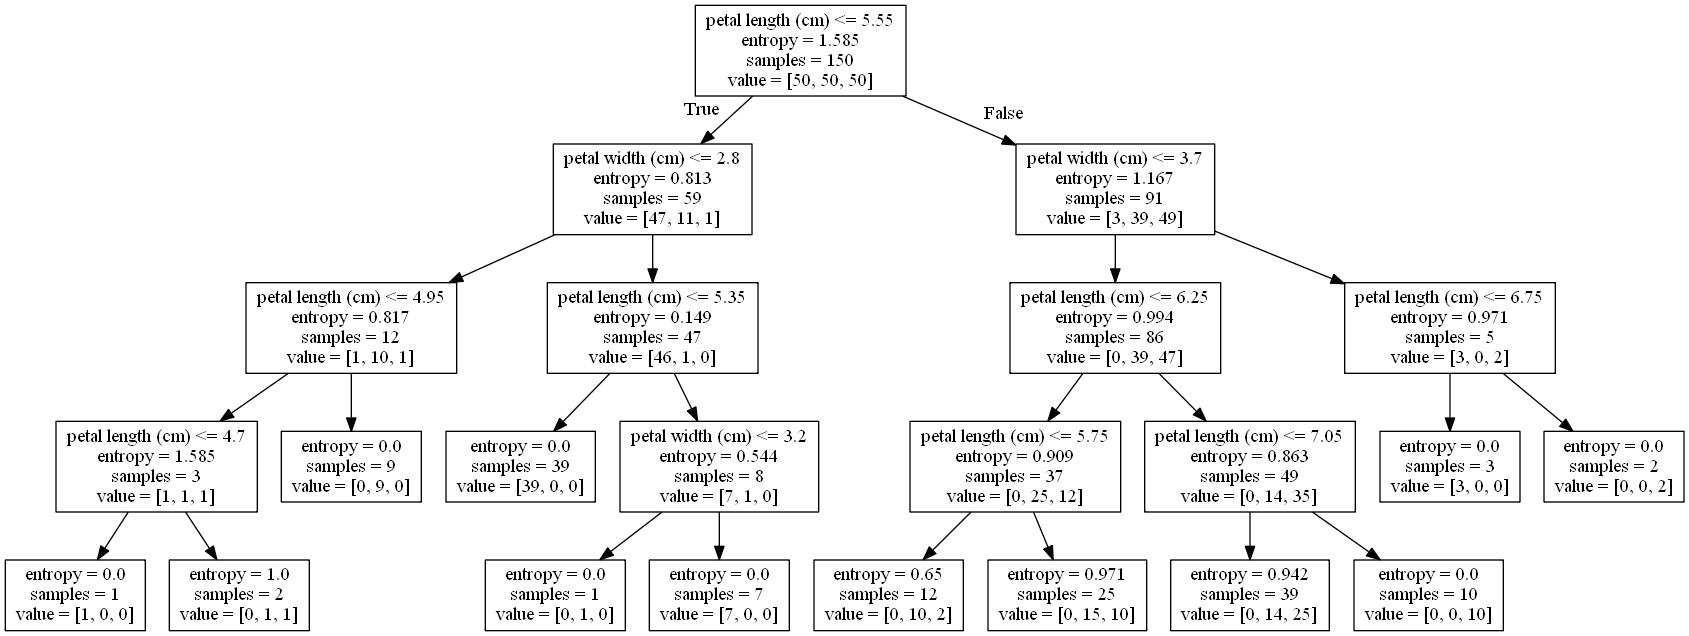

In [54]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)
draw_decision_tree(tree4)

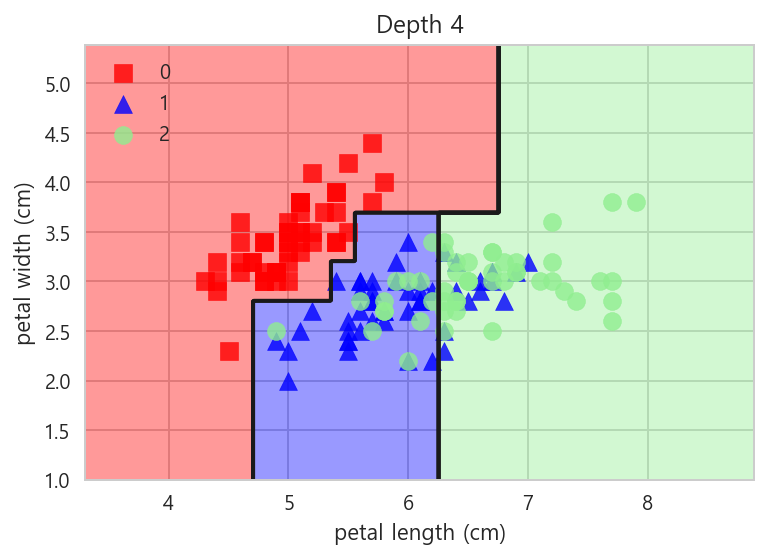

- Accuracy_Score :  0.82
- Confusion_Matrix 
 [[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.73      0.72      0.73        50
  virginica       0.73      0.74      0.73        50

avg / total       0.82      0.82      0.82       150



In [69]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()
from sklearn.metrics import *
print("- Accuracy_Score : ", accuracy_score(y,tree4.predict(X)))
print("- Confusion_Matrix \n",confusion_matrix(y, tree4.predict(X)))
print(classification_report(y, tree4.predict(X), target_names=iris.target_names))

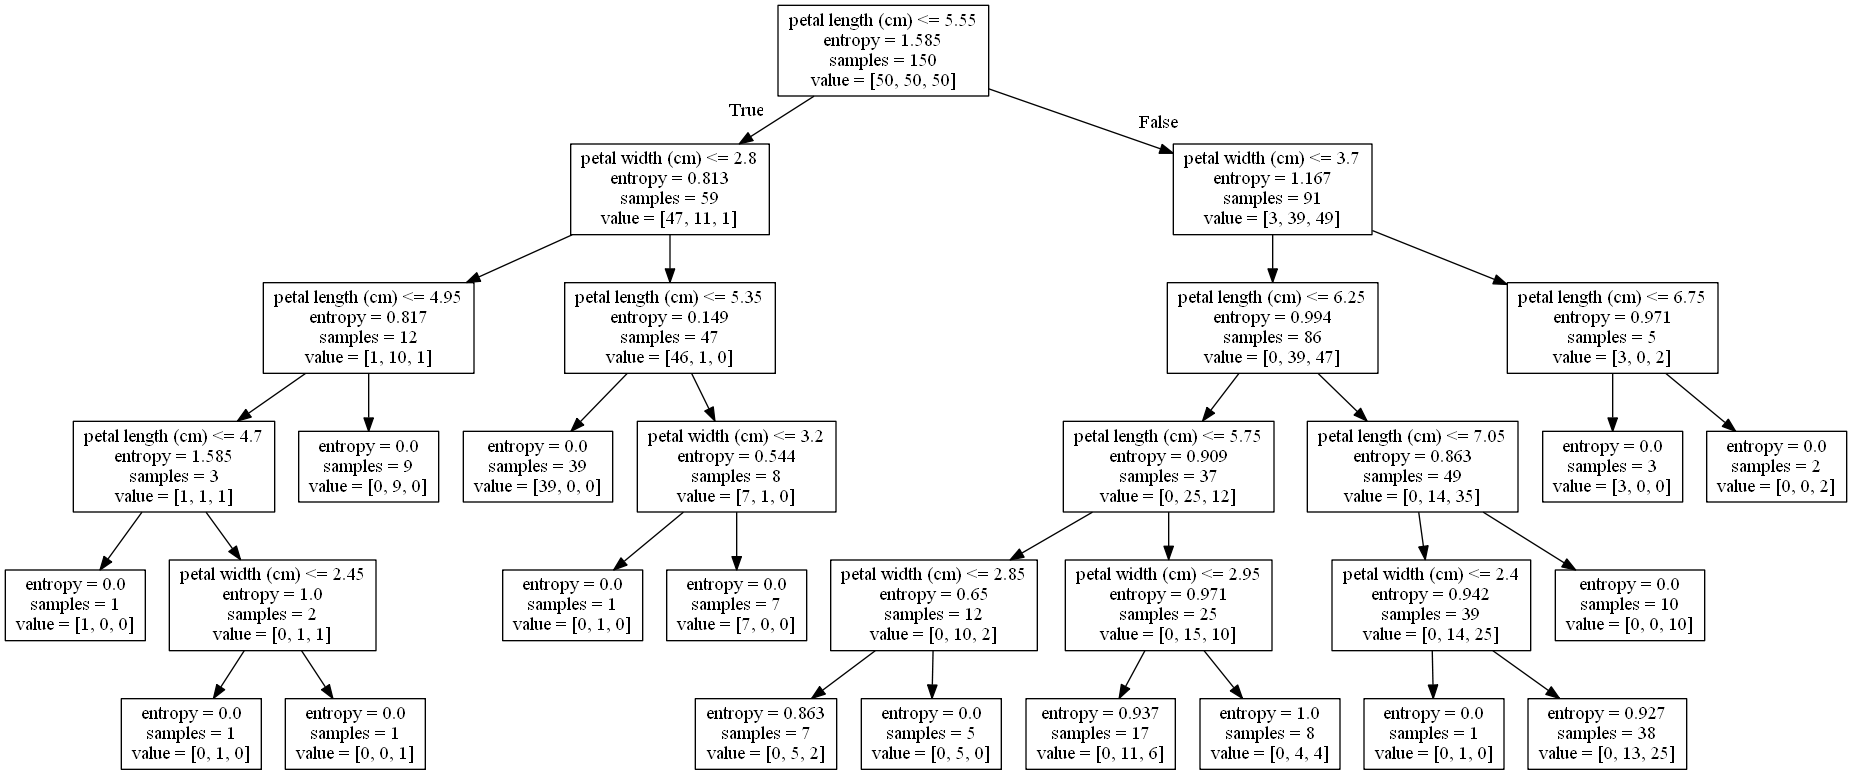

In [55]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)
draw_decision_tree(tree5)

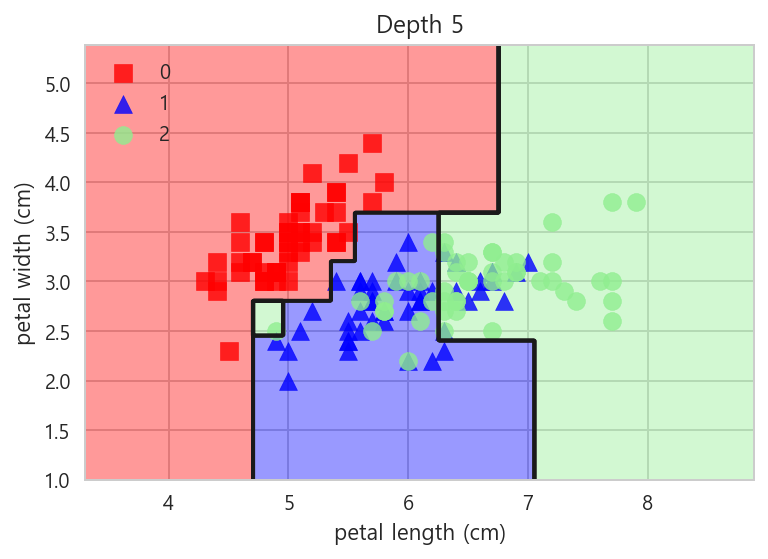

- Accuracy_Score :  0.833333333333
- Confusion_Matrix 
 [[50  0  0]
 [ 0 37 13]
 [ 0 12 38]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.76      0.74      0.75        50
  virginica       0.75      0.76      0.75        50

avg / total       0.83      0.83      0.83       150



In [68]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()
from sklearn.metrics import *
print("- Accuracy_Score : ", accuracy_score(y,tree5.predict(X)))
print("- Confusion_Matrix \n",confusion_matrix(y, tree5.predict(X)))
print(classification_report(y, tree5.predict(X), target_names=iris.target_names))

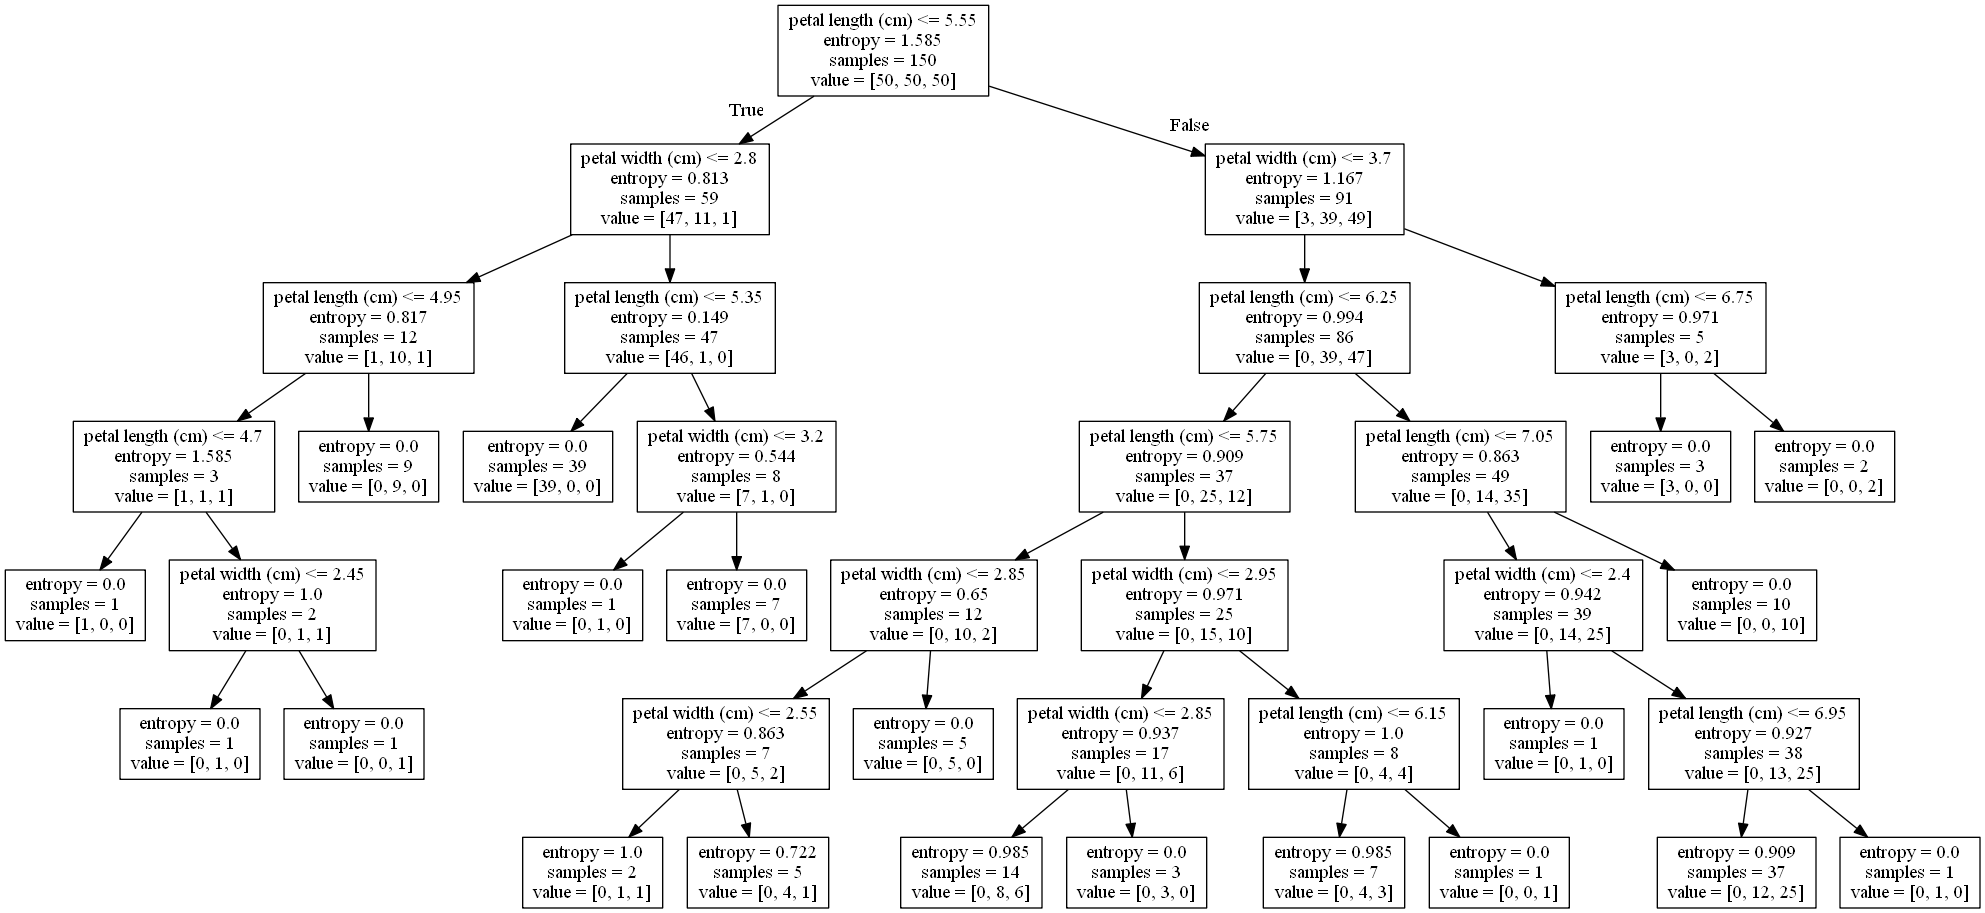

In [71]:
tree6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(X, y)
draw_decision_tree(tree6)

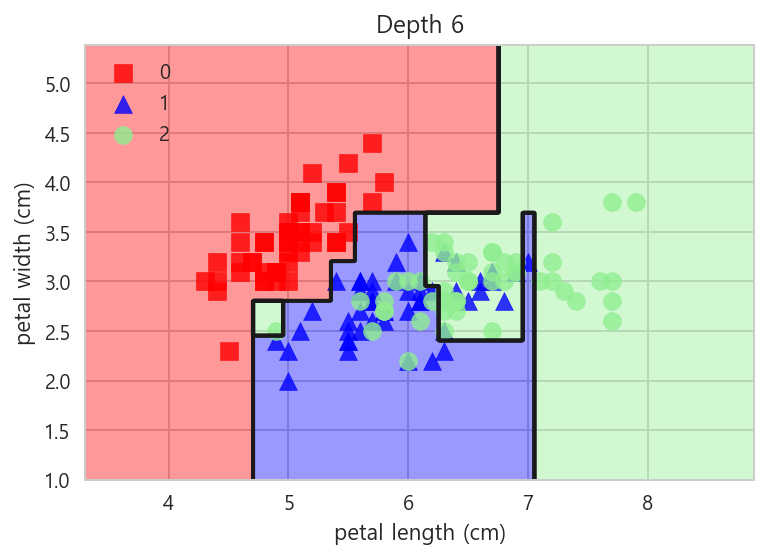

- Accuracy_Score :  0.846666666667
- Confusion_Matrix 
 [[50  0  0]
 [ 0 38 12]
 [ 0 11 39]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.78      0.76      0.77        50
  virginica       0.76      0.78      0.77        50

avg / total       0.85      0.85      0.85       150



In [72]:
plot_decision_regions(X, y, tree6, "Depth 6")
plt.show()
from sklearn.metrics import *
print("- Accuracy_Score : ", accuracy_score(y,tree6.predict(X)))
print("- Confusion_Matrix \n",confusion_matrix(y, tree6.predict(X)))
print(classification_report(y, tree6.predict(X), target_names=iris.target_names))

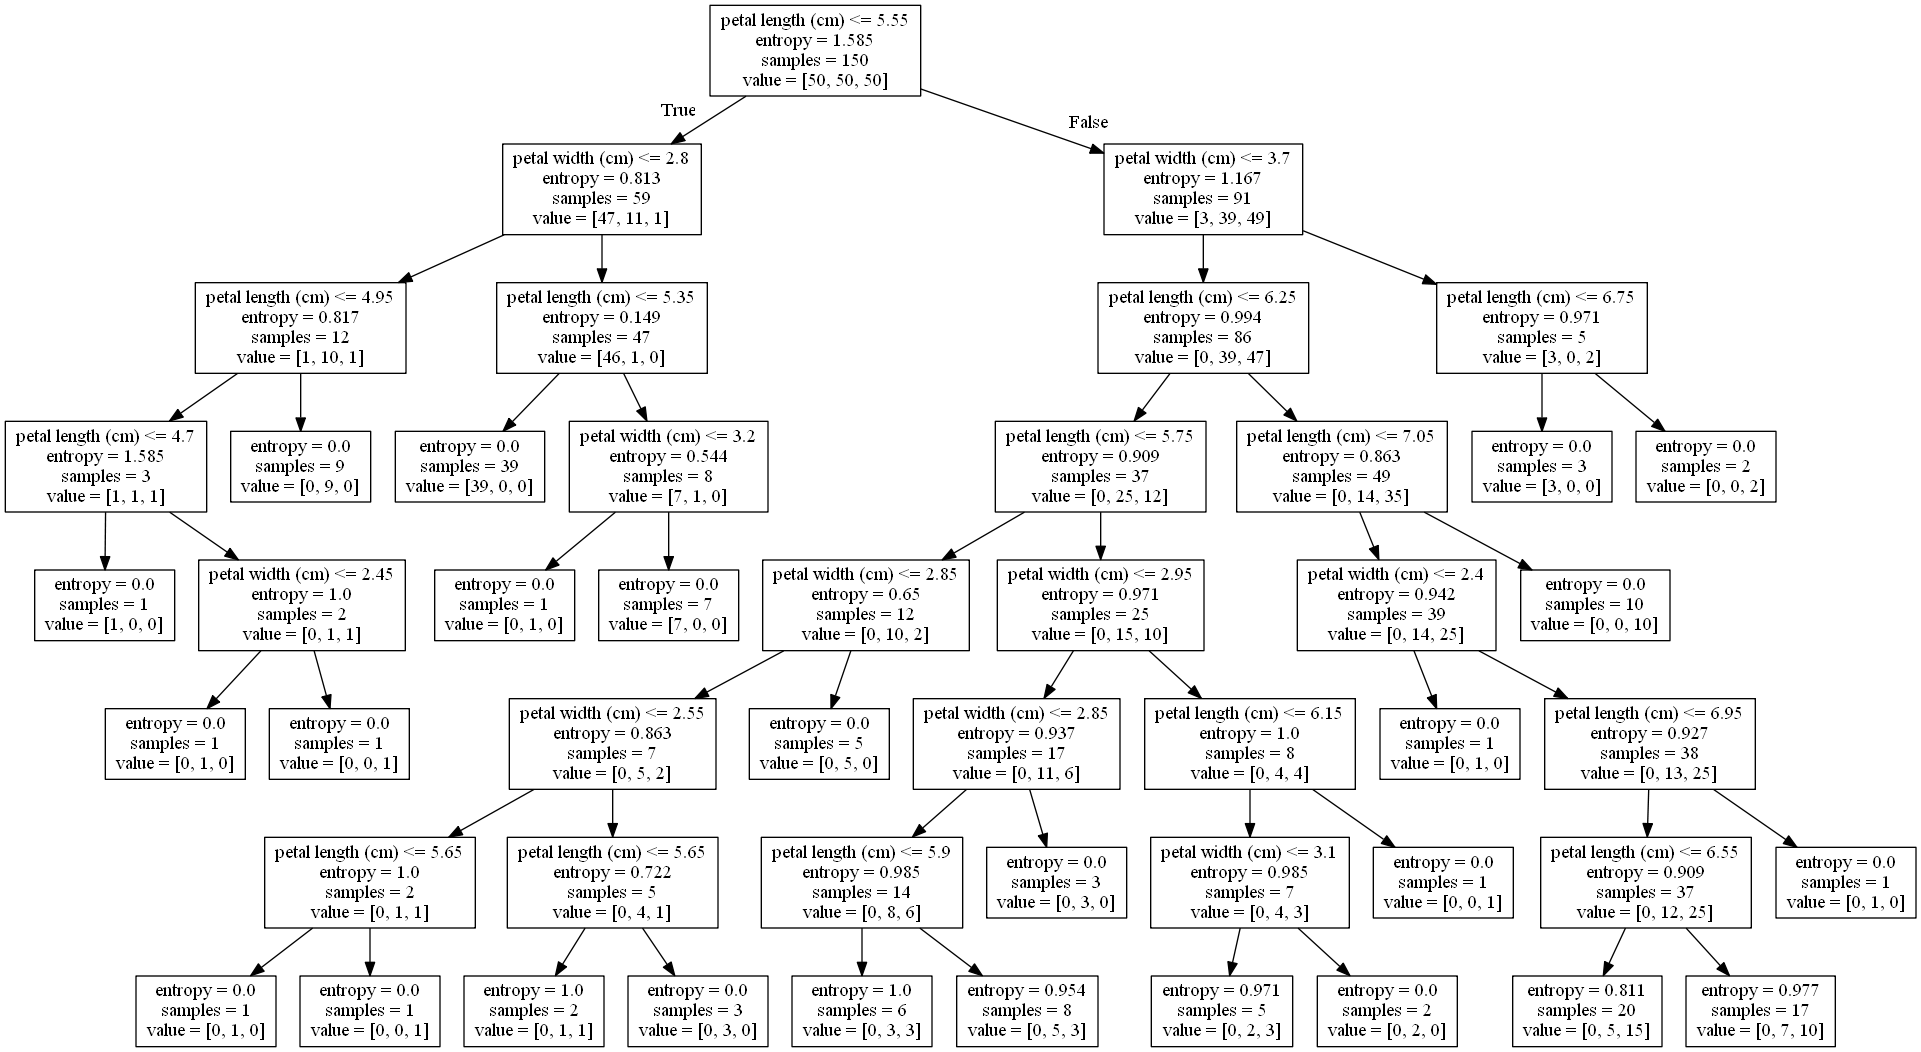

In [91]:
tree7 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0).fit(X, y)
draw_decision_tree(tree7)

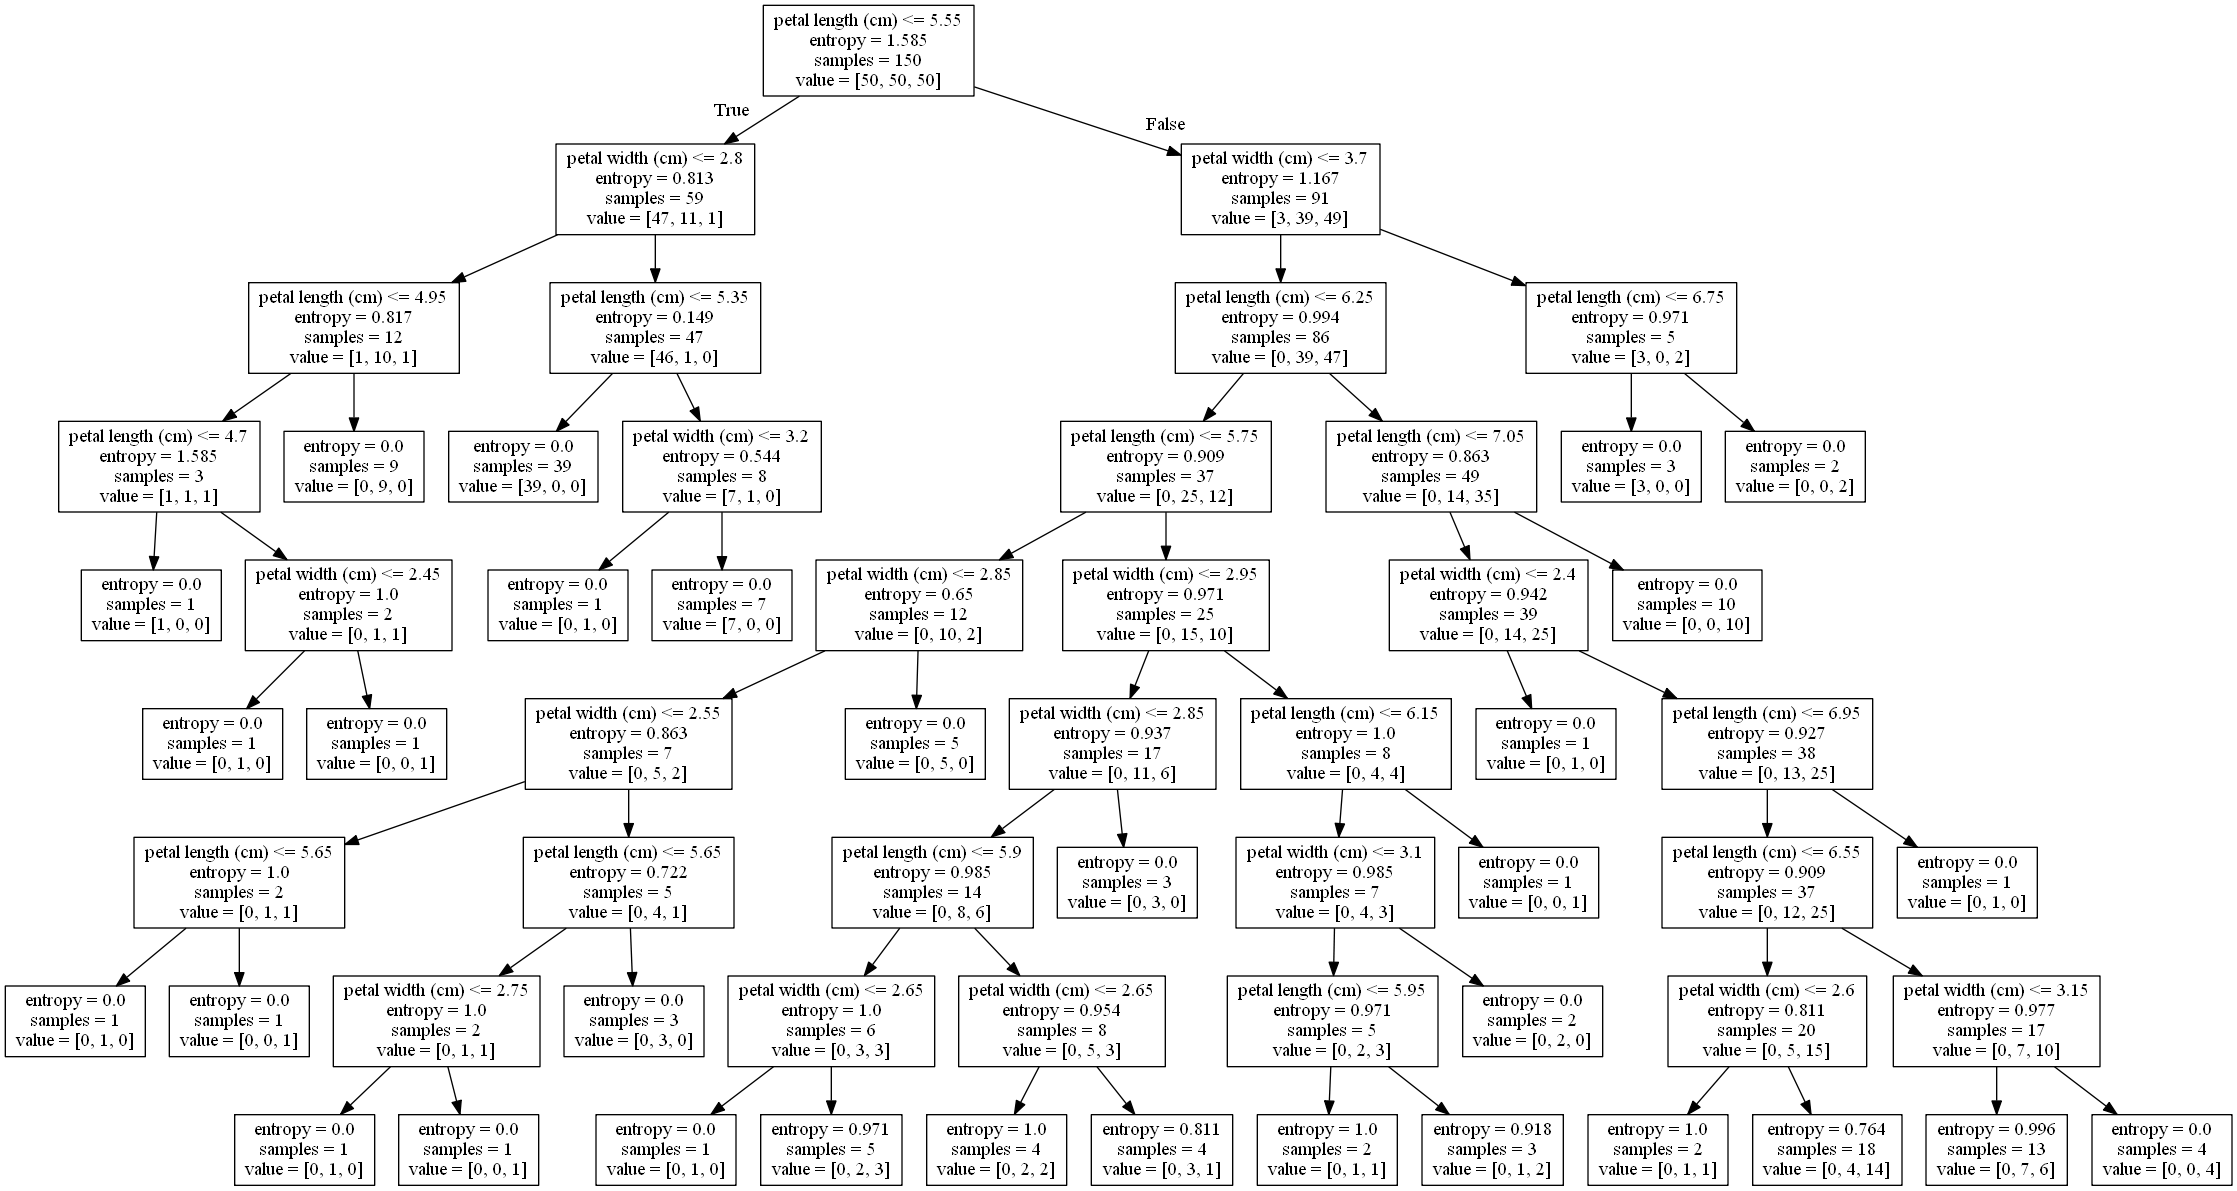

In [92]:
tree8 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0).fit(X, y)
draw_decision_tree(tree8)

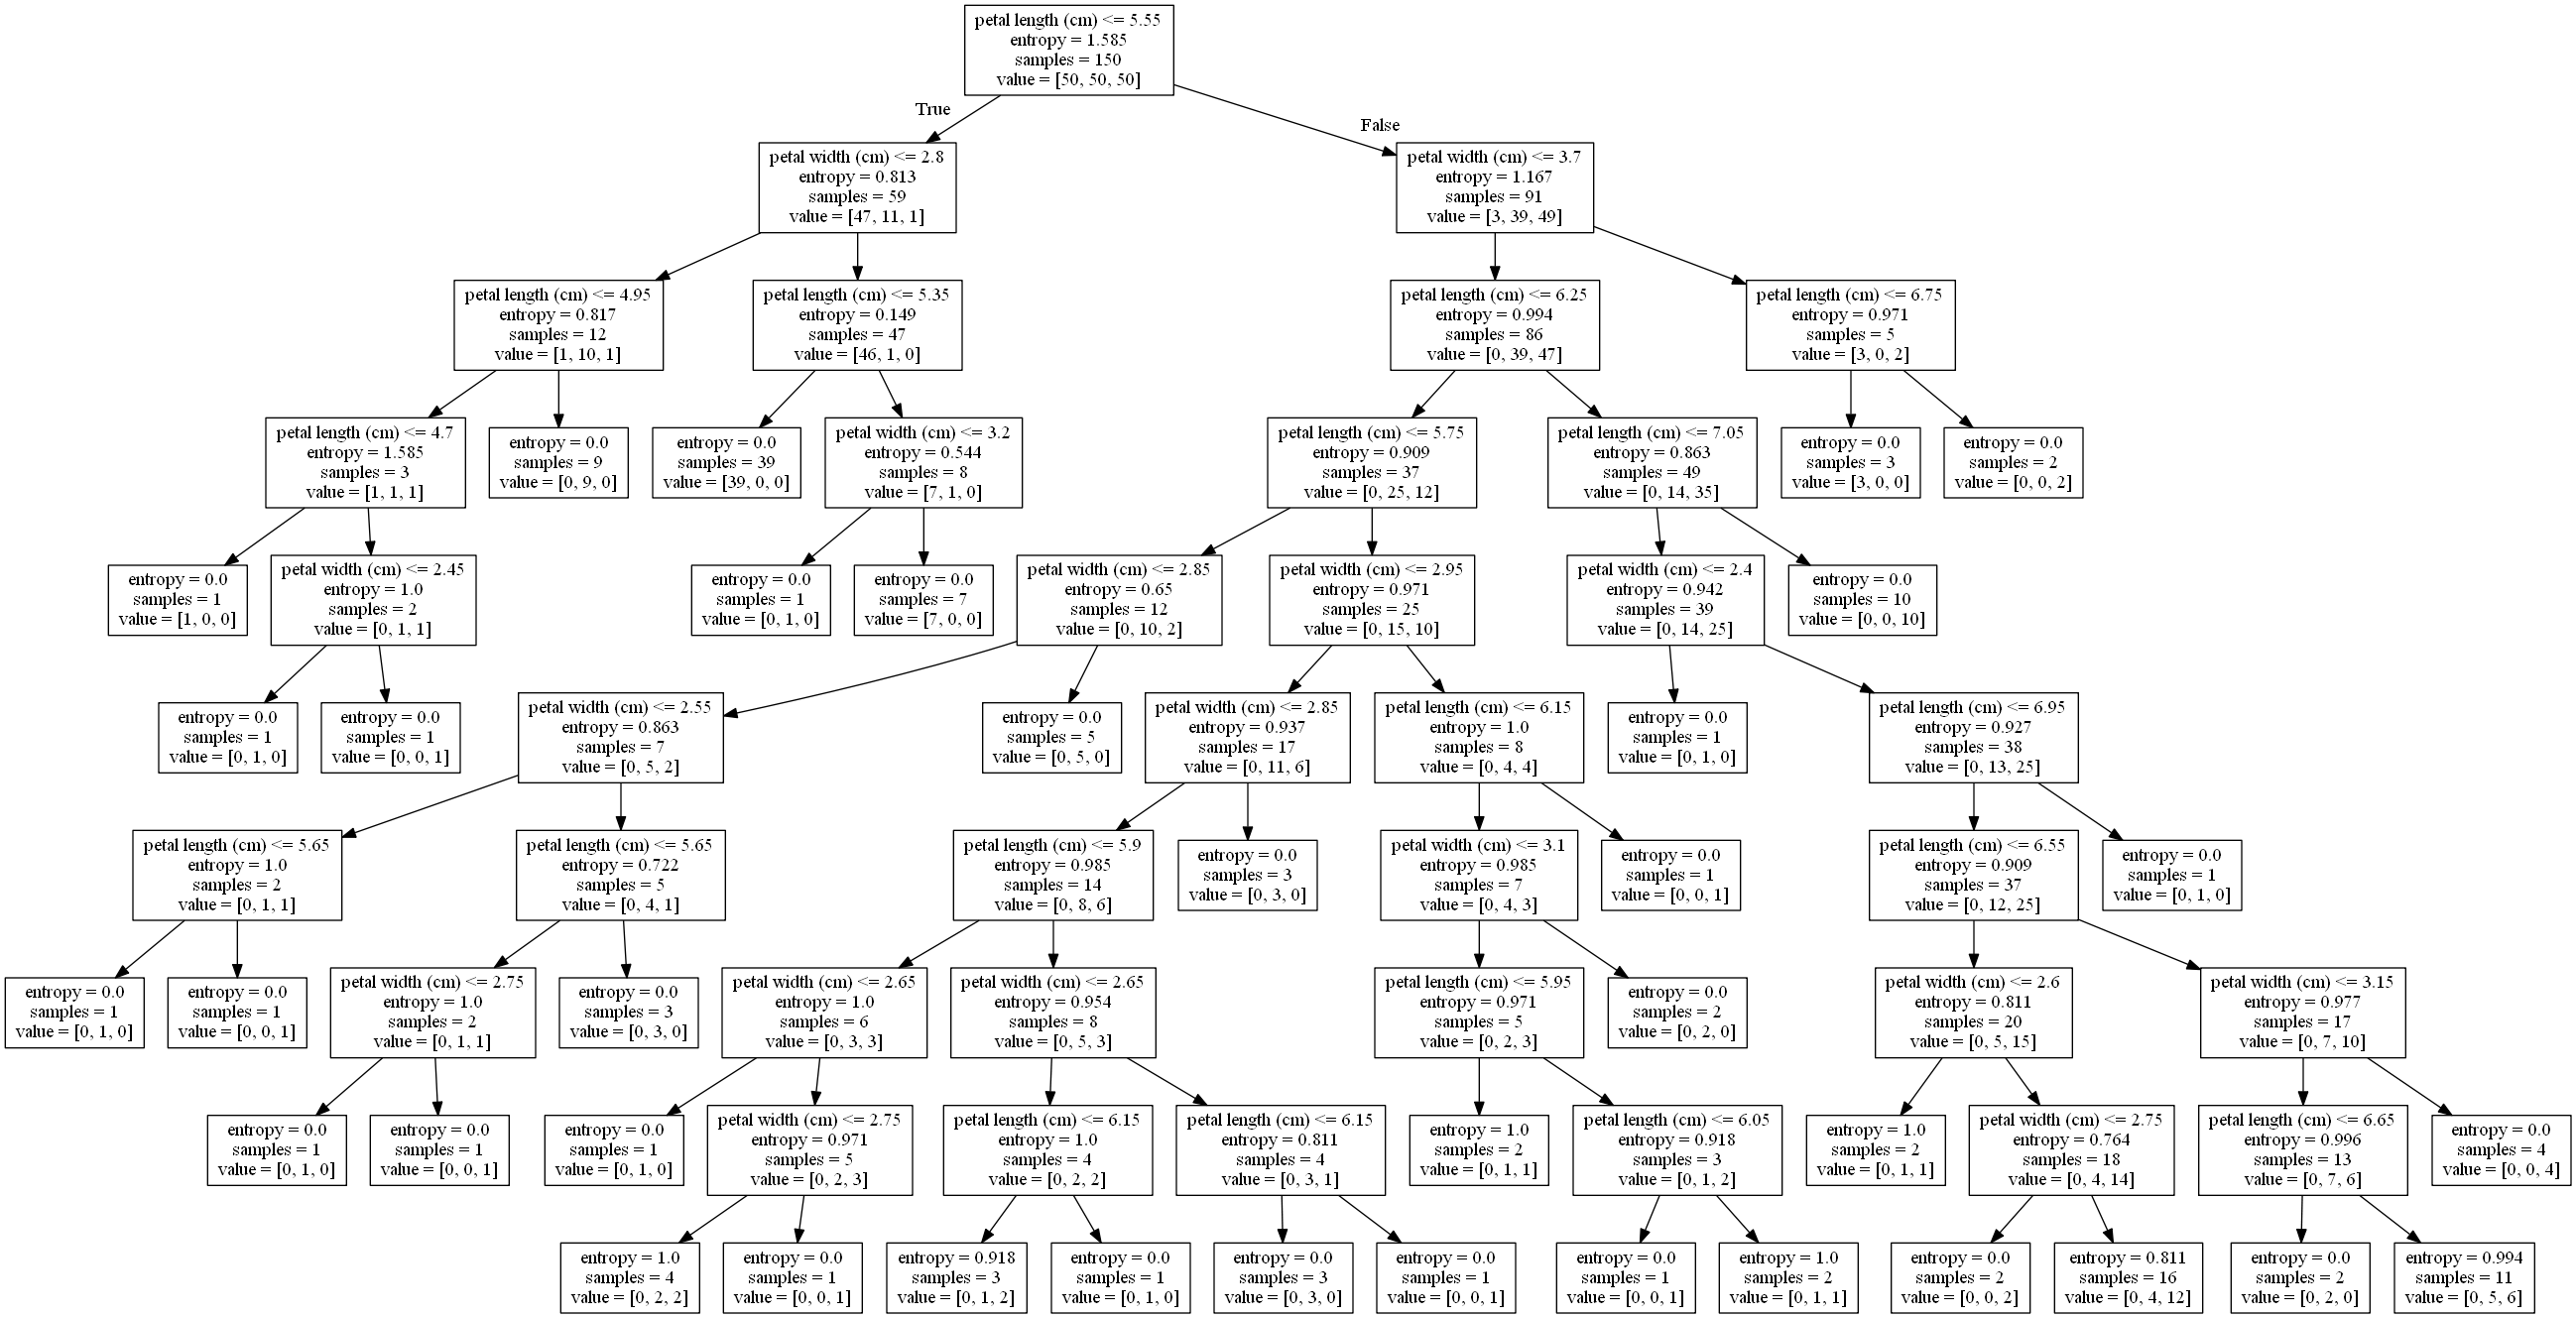

In [93]:
tree9 = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0).fit(X, y)
draw_decision_tree(tree9)

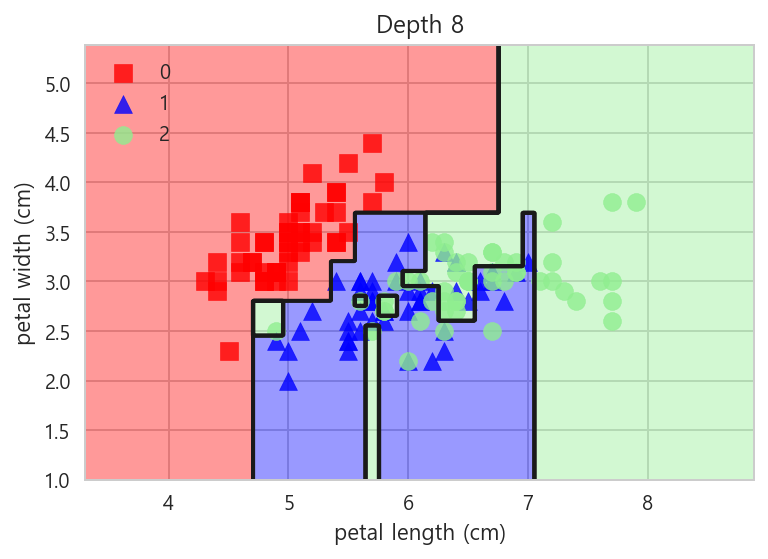

- Accuracy_Score :  0.88
- Confusion_Matrix 
 [[50  0  0]
 [ 0 43  7]
 [ 0 11 39]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.80      0.86      0.83        50
  virginica       0.85      0.78      0.81        50

avg / total       0.88      0.88      0.88       150



In [97]:
plot_decision_regions(X, y, tree8, "Depth 8")
plt.show()
from sklearn.metrics import *
print("- Accuracy_Score : ", accuracy_score(y,tree8.predict(X)))
print("- Confusion_Matrix \n",confusion_matrix(y, tree8.predict(X)))
print(classification_report(y, tree8.predict(X), target_names=iris.target_names))

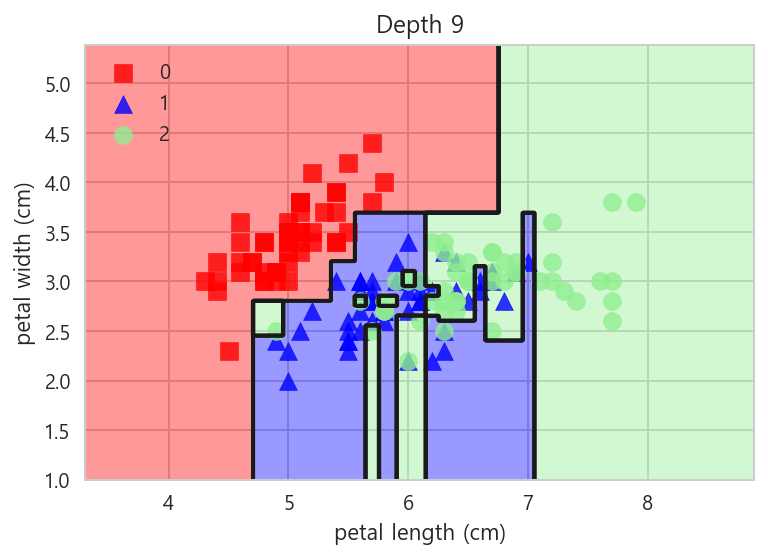

- Accuracy_Score :  0.9
- Confusion_Matrix 
 [[50  0  0]
 [ 0 40 10]
 [ 0  5 45]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.89      0.80      0.84        50
  virginica       0.82      0.90      0.86        50

avg / total       0.90      0.90      0.90       150



In [96]:
plot_decision_regions(X, y, tree9, "Depth 9")
plt.show()
from sklearn.metrics import *
print("- Accuracy_Score : ", accuracy_score(y,tree9.predict(X)))
print("- Confusion_Matrix \n",confusion_matrix(y, tree9.predict(X)))
print(classification_report(y, tree9.predict(X), target_names=iris.target_names))

In [102]:
tree10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(X, y)
# draw_decision_tree(tree10)

Tree Model1: Mean score: 0.620
Tree Model2: Mean score: 0.653
Tree Model3: Mean score: 0.700
Tree Model4: Mean score: 0.760
Tree Model5: Mean score: 0.800
Tree Model6: Mean score: 0.713
Tree Model7: Mean score: 0.713
Tree Model8: Mean score: 0.680
Tree Model9: Mean score: 0.660
Tree Model10: Mean score: 0.660


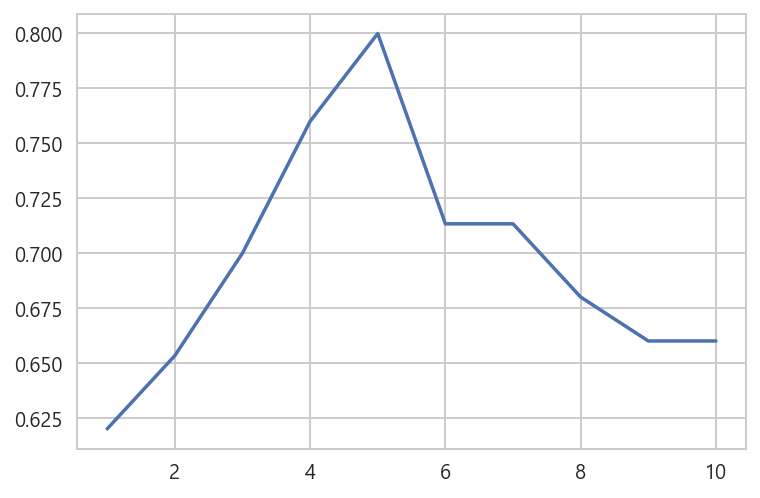

In [104]:
from sklearn.model_selection import cross_val_score, KFold
ls = []
for i, model in enumerate([tree1,tree2,tree3,tree4,tree5,tree6,tree7,tree8,tree9,tree10]):
    scores = cross_val_score(model, X,y,cv=10)
#     accuracy_score(y,tree9.predict(X)) #원래는 이걸 가공해서 해야된다.
    print(("Tree Model{0:d}: Mean score: {1:.3f}").format(i+1,np.mean(scores)))
    ls.append(np.mean(scores))

plt.plot(range(1,len(ls)+1),list(ls))
# max_depth가 5일때 가장 높음

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 에이다 부스트

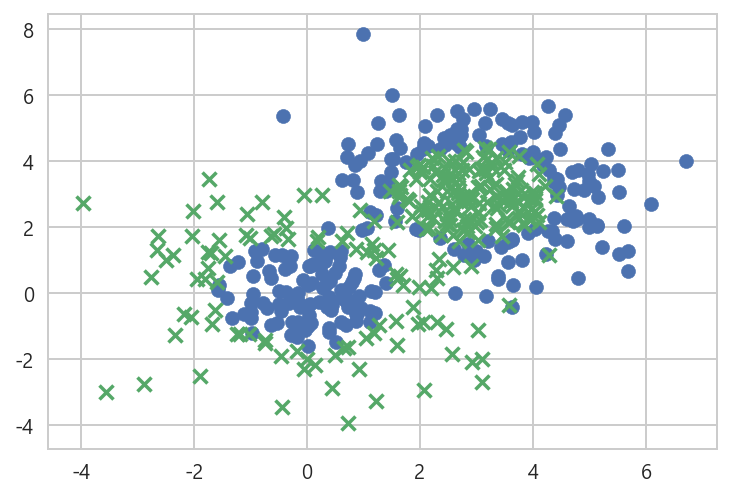

In [11]:
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

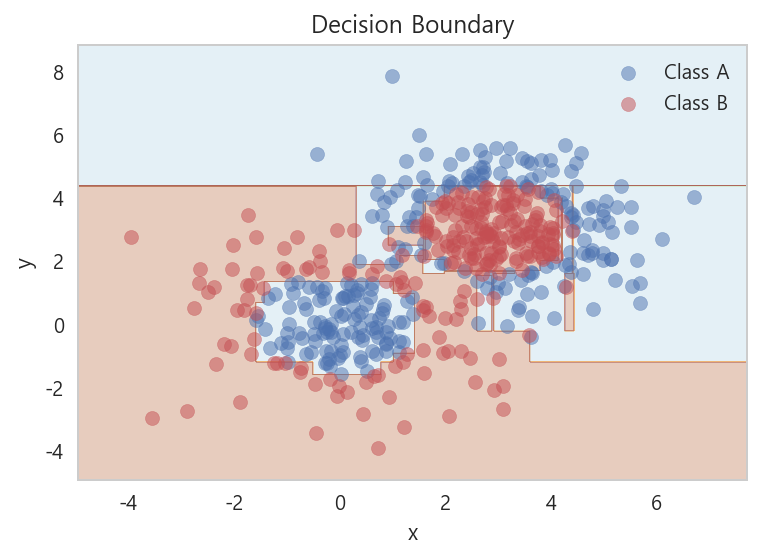

In [13]:
def plot_result(model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

    for i, n, c in zip(range(2), "AB", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, alpha=0.5, label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    plt.grid(False)
    plt.show()
    
plot_result(tree)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), 
                               algorithm="SAMME", n_estimators=100)
model_ada.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

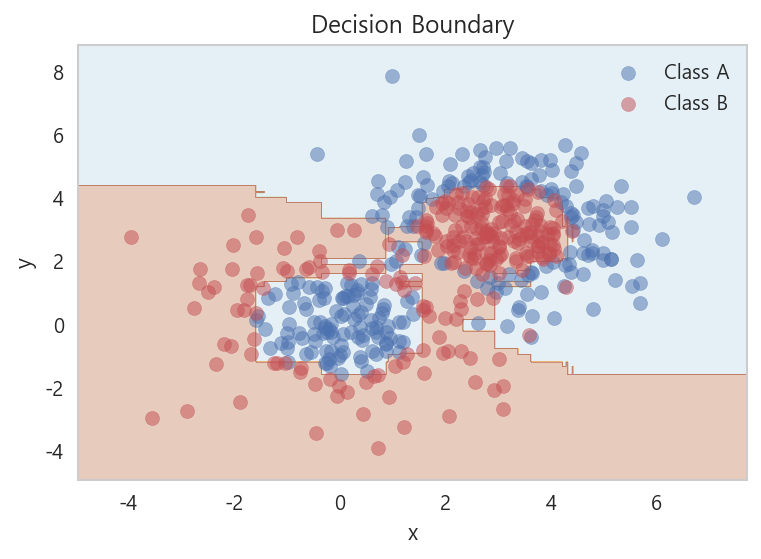

In [15]:
plot_result(model_ada)

# 그래디언트 부스트

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [17]:
%%time
model_grad.fit(X, y)

Wall time: 49.9 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

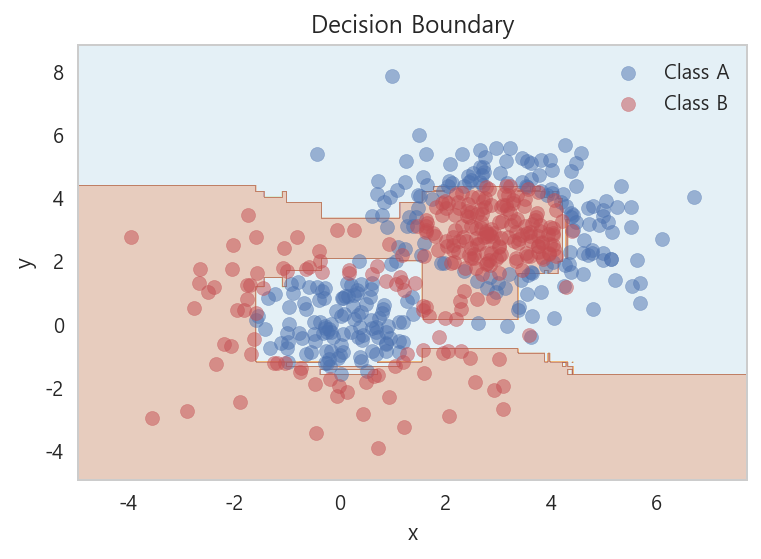

In [18]:
plot_result(model_grad)

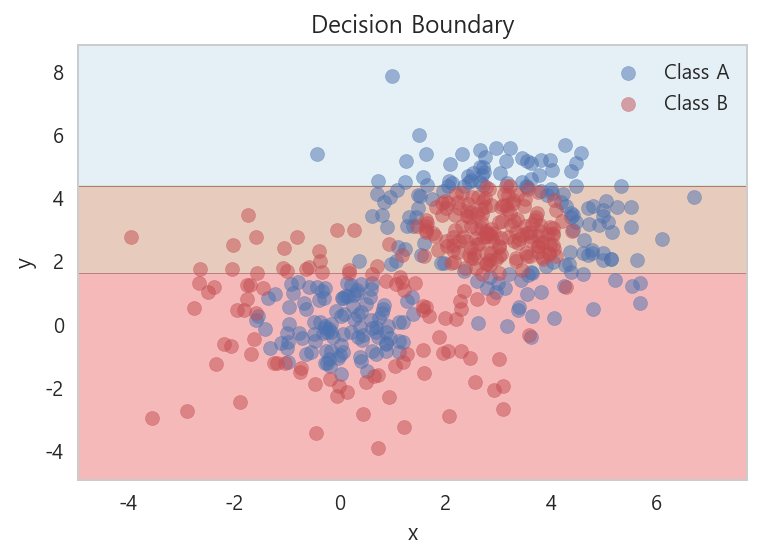

In [19]:
plot_result(model_grad.estimators_[0][0])

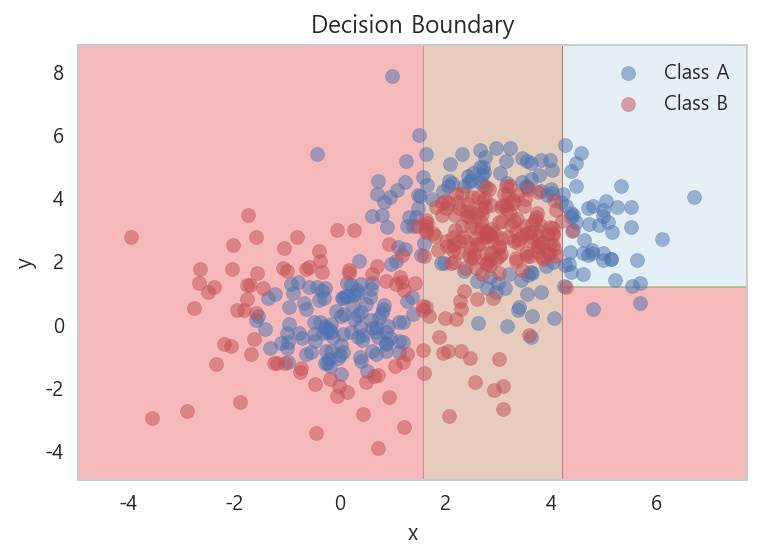

In [20]:
plot_result(model_grad.estimators_[1][0])

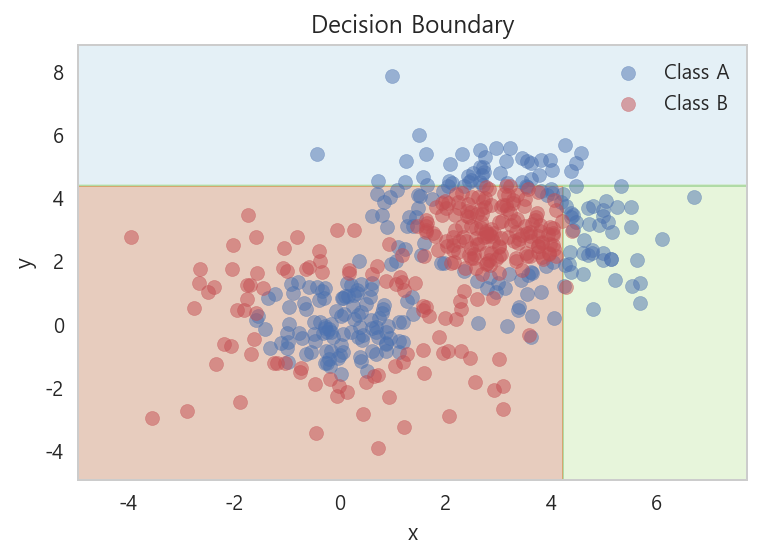

In [21]:
plot_result(model_grad.estimators_[2][0])

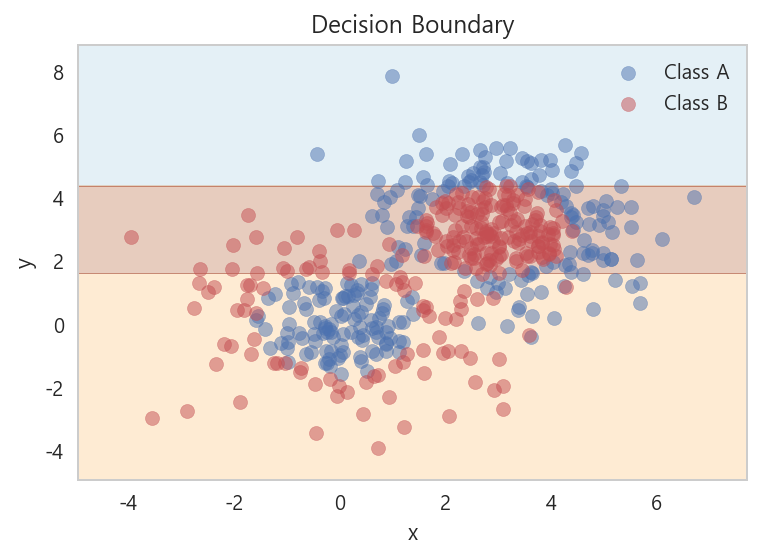

In [22]:
plot_result(model_grad.estimators_[3][0])

# XGBoost 라이브러리

In [23]:
import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [24]:
%time
model_xgb.fit(X, y)

Wall time: 0 ns


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

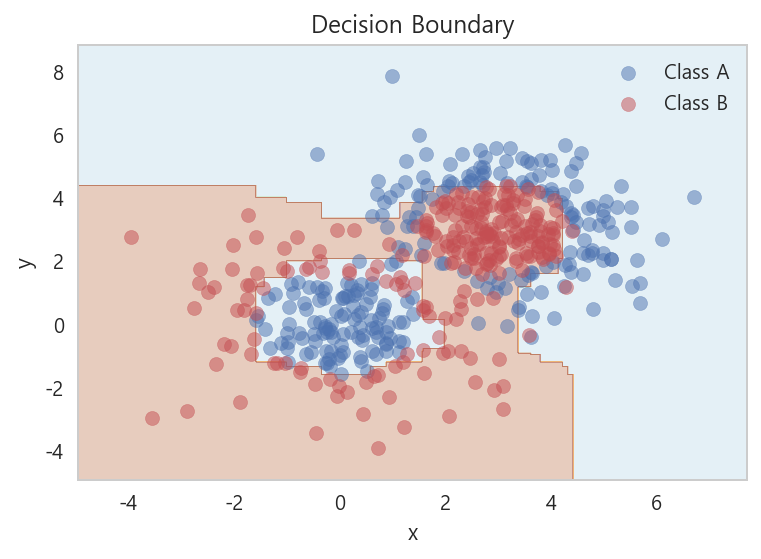

In [25]:
plot_result(model_xgb)

In [ ]:
# LIGHTGBM이 그래디언트 부스팅중에 가장 빠르고 정확성도 좋다... 정리안하고 대강넣어도 잘된다고..
# 뭐 잘 모르면 XGBoost사용해도 된다. 그것도 빠르다.

In [ ]:
# Mixture of Experts
# Stacking... 이렇게 하는 방법도 있습니다만... 잘쓰는지는 모르겠습니다.

In [ ]:
# XGBoost 깔기
# 커멘드창에 anaconda search -t conda xgboost
# 나오는 결과중 맞는조건 찾아서  conda install -c <특수경로> xgboost 입력
# 예) conda install -c mikesilva xgboost